#### Team Data Navigators - MNIST Convolution Assignment
Please implement a 2D convolution function to apply to MNIST dataset

In [1]:
import sklearn 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

### Loading and plotting reduced MNIST dataset

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
type(digits)

sklearn.utils.Bunch

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [6]:
digits.data[1], digits.target[1]

(array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]),
 1)

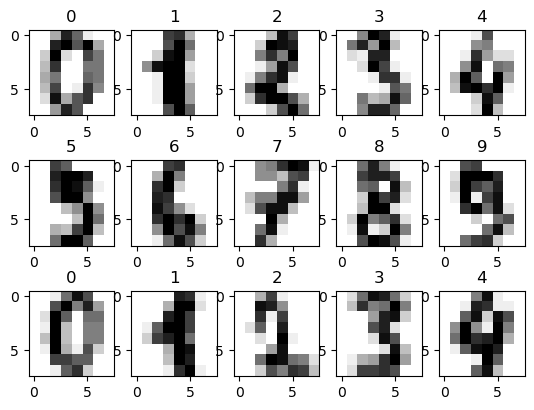

In [7]:
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    # Note: reshape is 8x8 as it is reduced dataset
    plottable_image = np.reshape(digits.data[im_idx], (8, 8)) 
    ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].set_title(digits.target[im_idx])

### Loading full MNIST dataset from OpenML via SKLearn

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [9]:
type(mnist.data)

pandas.core.frame.DataFrame

In [10]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


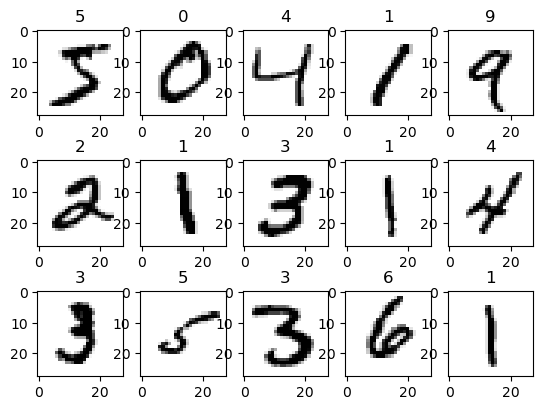

In [11]:
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    # Note: reshape is 28x28 as it is full dataset
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].set_title(mnist.target[im_idx])

In [12]:
mnist.data.shape

(70000, 784)

In [13]:
x1 = np.arange(16.0).reshape((4, 4))
x1 

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [14]:
x1[1:3, 1:3]*x1[0:2, 0:2]

array([[ 0.,  6.],
       [36., 50.]])

In [15]:
x1

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

### Assignment - Implement a 2D convolution function

In [16]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation -- The kernel needs to be inverted before applying
    kernel = np.flipud(np.fliplr(kernel))
    if (image.shape[0] + 2*padding) < kernel.shape[0] or (image.shape[1] + 2*padding) < kernel.shape[1]:
        raise ValueError("image is larger than kernel")
    output_x = int(image.shape[0] + 2*padding - kernel.shape[0]/strides)
    output_y = int(image.shape[1] + 2*padding - kernel.shape[1]/strides)
    output = np.zeros((output_x, output_y))
    for x in range(0, output_x):
        for y in range(0, output_y):
            #ignore padding for now because it's a little oconfusing how padding works?
            image_filter = image[strides*x:strides*x+kernel.shape[0], strides*y:strides*y + kernel.shape[1]]
            output[x][y] = np.sum(image_filter * kernel)
    return output

#### Tests - the following code should run correctly if your function is correctly implemented

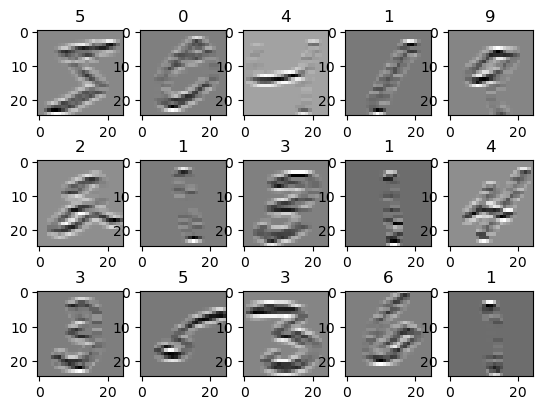

In [17]:
# Horizontal Edge detection kernel/filter
kernel = np.array([[-1, -1, -1], 
                   [2, 2, 2], 
                   [-1, -1, -1]])

# Plotting the digits
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28, 28))
    # Applying the kernel
    convolution = convolve2D(plottable_image, kernel)
    ax[i].imshow(convolution, cmap='gray_r')
    ax[i].set_title(mnist.target[im_idx])

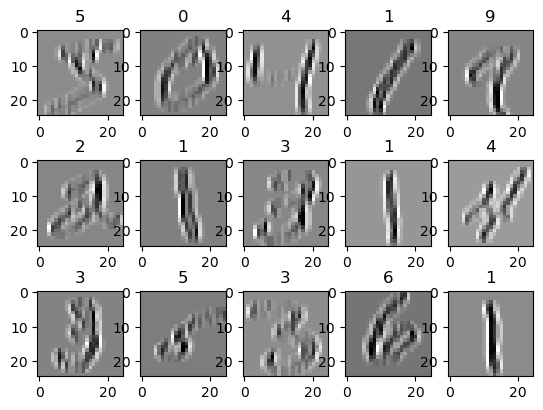

In [18]:
# Vertical Edge detection
kernel = np.array([[-1, 2, -1], 
                   [-1, 2, -1], 
                   [-1, 2, -1]])

# Plotting the digits
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28, 28))
    # Applying the kernel
    convolution = convolve2D(plottable_image, kernel)
    ax[i].imshow(convolution, cmap='gray_r')
    ax[i].set_title(mnist.target[im_idx])

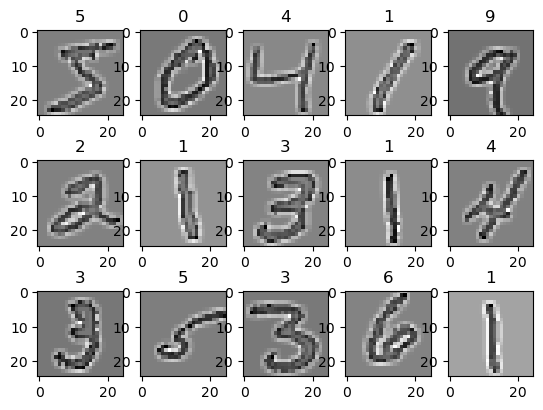

In [19]:
# Edge detection kernel
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

# Plotting the digits
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28, 28))
    # Applying the kernel
    convolution = convolve2D(plottable_image, kernel)
    ax[i].imshow(convolution, cmap='gray_r')
    ax[i].set_title(mnist.target[im_idx])

### Split test and training

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=22)

Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [25]:
clf.score(X_test, y_test)

0.6180519480519481

In [26]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9224675324675324

logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticRegr = LogisticRegression()

In [29]:
logisticRegr.fit(X_train, y_train)

/Users/aouyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logisticRegr.score(X_test, y_test)

0.9181818181818182

xgboost

In [31]:
# from xgboost import XGBClassifier
# XGB_model = XGBClassifier()
# int_y_train = [int(i) for i in y_train]
# XGB_model.fit(X_train, int_y_train)

In [32]:
# y_pred=XGB_model.predict(X_test)

In [33]:
# from sklearn.metrics import accuracy_score
# int_y_test = [int(i) for i in y_test]
# accuracy = accuracy_score(int_y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Simple CNN?

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [ ]:
image_shape = (8,8,1) 

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])